In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix

In [5]:
#importing datasets
data = pd.read_csv('/Users/aashish/Desktop/session3_datafile_mlp.csv')
#to view top n rows of our dataset
data.head(6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
status = data.Loan_Status.value_counts()
print(status)

Y    422
N    192
Name: Loan_Status, dtype: int64


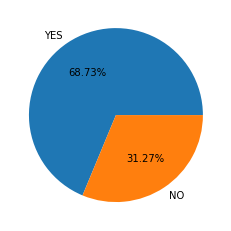

In [23]:
plt.pie(status,labels = ("YES", "NO"),autopct = "%.2f%%")
plt.show()

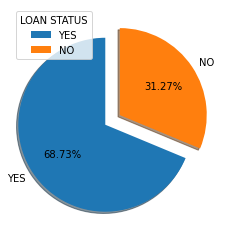

In [21]:
myexplode = [0.2, 0]
plt.pie(status,labels = ("YES", "NO"),autopct = "%.2f%%",startangle = 90,explode = myexplode,shadow = True)
plt.legend(title = "LOAN STATUS")
plt.show()

In [25]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
new_data = data.dropna()
x= new_data.isna().sum()
y=data.isna().sum()
print(x,"\n\n",y)


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64 

 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [77]:
#converting into numerical data
#Yes: 1
# No : 0
# unknown:2
data['Gender_n'] = data['Gender'].replace({'Male':0, 'Female':1,'unknown' : 2})
data['Married_n'] = data['Married'].replace({'Yes' :1, 'No': 0, 'unknown':2})
data['Education_n'] = data['Education'].replace ({'Graduate' : 1, 'Not Graduate' : 0})
data['Self_Employed_n'] = data['Self_Employed'].replace ({'Yes': 1,'No' : 0, 'unknown':2})
data['Dependents'] = data['Dependents'].replace({'3+':3})
data.head()






,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_n,Married_n,Education_n,Self_Employed_n
0,LP001002,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y,0.0,0.0,1,0.0
1,LP001003,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N,0.0,1.0,1,0.0
2,LP001005,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y,0.0,1.0,1,1.0
3,LP001006,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.0,1.0,0,0.0
4,LP001008,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y,0.0,0.0,1,0.0


In [90]:
data['Gender'] = data['Gender'].replace({'Male':0, 'Female':1,'unknown' : 2})
data['Married'] = data['Married'].replace({'Yes' :1, 'No': 0, 'unknown':2})
data['Education'] = data['Education'].replace ({'Graduate' : 1, 'Not Graduate' : 0})
data['Self_Employed'] = data['Self_Employed'].replace ({'Yes': 1,'No' : 0, 'unknown':2})
data['Dependents'] = data['Dependents'].replace({'3+':3})
data['Property_Area'] = data['Property_Area'].replace ({'Rural': 1,'Urban' : 0, 'Semiurban':2})
data['Loan_Status'] = data['Loan_Status'].replace({'Y':1, 'N':0})
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_n,Married_n,Education_n,Self_Employed_n
0,LP001002,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,0,1,0.0,0.0,1,0.0
1,LP001003,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,2,0,0.0,1.0,1,0.0
2,LP001005,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1,0.0,1.0,1,1.0
3,LP001006,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1,0.0,1.0,0,0.0
4,LP001008,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1,0.0,0.0,1,0.0


In [91]:
X = new_data.iloc[:,1:-1]
Y = new_data.iloc[:, -1]
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size = 0.3, random_state=100)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban


In [92]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

LR = KNeighborsClassifier(n_neighbors=10)


In [93]:
#fiting the model
LR.fit(X_train, Y_train)

ValueError: could not convert string to float: 'Rural'